In [43]:
import pandas as pd
import numpy as np
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Activation, Flatten, Dense, Dropout, MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

In [44]:
# Load dataset
df = pd.read_csv("C:\\Users\\Akshaj Seerpu\\Desktop\\College\\RAPID\\1stand2ndcombine.csv")

In [45]:
# Prepare features and labels
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [46]:
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Save label encoder classes
np.save('label_encoder_classes.npy', label_encoder.classes_)

In [47]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

In [48]:
# Reshape data for Conv1D
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [49]:
model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
# model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(128, kernel_size=3, activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(256, kernel_size=3, activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(512, kernel_size=3, activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

C:\Users\Akshaj Seerpu\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

# Train model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.0356 - loss: 11.1495 - val_accuracy: 0.0407 - val_loss: 4.7743
Epoch 2/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0506 - loss: 4.3307 - val_accuracy: 0.0431 - val_loss: 3.9054
Epoch 3/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0617 - loss: 3.7734 - val_accuracy: 0.0622 - val_loss: 3.7234
Epoch 4/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0903 - loss: 3.6679 - val_accuracy: 0.0550 - val_loss: 3.6141
Epoch 5/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0731 - loss: 3.5385 - val_accuracy: 0.1244 - val_loss: 3.5094
Epoch 6/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.1031 - loss: 3.4436 - val_accuracy: 0.1220 - val_loss: 3.4500
Epoch 7/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1035 - loss: 3.4090 - val_accuracy: 0.1244 - val_loss: 3.3143
Epoch 8/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1297 - loss: 3.2785 - val_accuracy: 0

In [52]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9141 - loss: 0.5638
Test accuracy: 0.9066985845565796


In [53]:
# Save model
model.save('sign_language_model_2.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Predicted label: hear


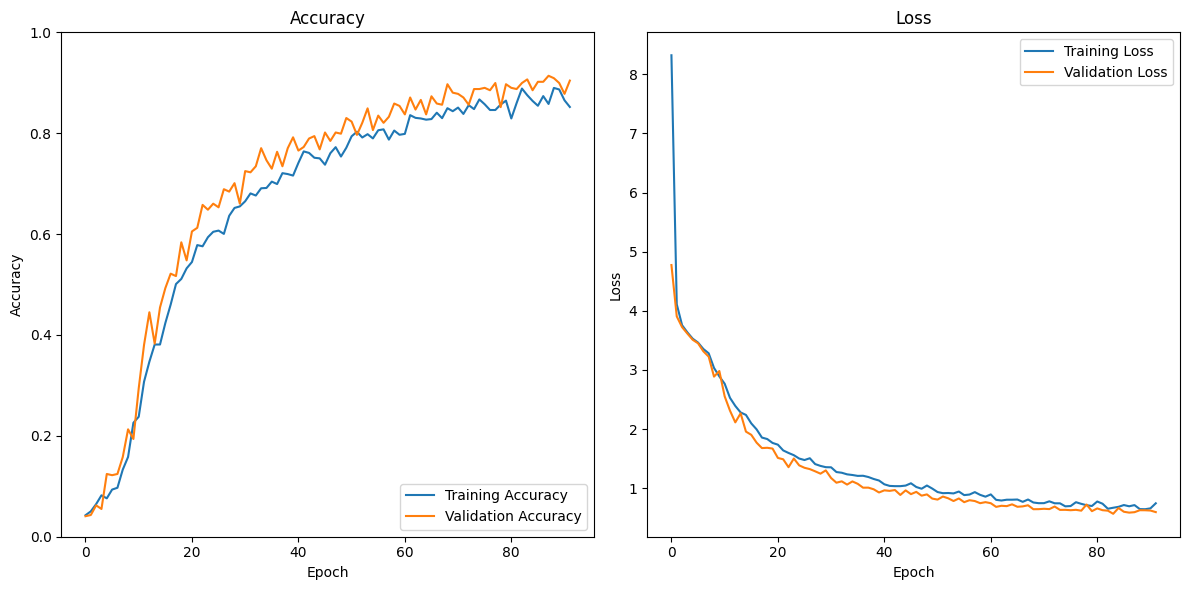

In [54]:
# Prediction function
def predict_sign_language(keypoints):
    keypoints = np.array(keypoints).reshape(1, len(keypoints), 1)
    prediction = model.predict(keypoints)
    label_index = np.argmax(prediction)
    return label_encoder.inverse_transform([label_index])[0]

# Example prediction
example_keypoints = X_test[0].flatten()
predicted_label = predict_sign_language(example_keypoints)
print(f'Predicted label: {predicted_label}')

# Plot training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss')

plt.tight_layout()
plt.show()